Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Enter start node's (x,y) coordinates seperated by comma. Ex: 1,2 10,11
Start node x-coordinate: 10
Start node y-coordinate: 11

Enter goal node's (x,y) coordinates seperated by comma. Ex: 1,2 10,12
Goal node x-coordinate: 10
Goal node y-coordinate: 12

########################################################
Node Popped from of Num Queue, Curr Length:  0

Parent IDX:  0

Current Parent Node:
(0, 1, 0, (10, 11))

Action Left (-1,0)
Valid Move Boolean -> True
Child Node X-Coord:  9
Child Node Y-Coord:  11

- - - - - - - - - - - - - - - - - - 

Equal to Goal State ? :  False

child_node_x_valid:  9
child_node_y_valid:  11
Child not yet visited/explored, open_queue appended
Length of Open Queue:  1
Length of Visited Queue:  1
Goal Found Boolean:  False

Parent IDX:  1
Current Valid Child IDX:  2

#################################################################

Action Up (0,1)
is_node_obstacle ? : False
Valid Move Boolean -> True
Child Node X-Coord:  10
Child Node Y-Coord:  12

- - - - - 

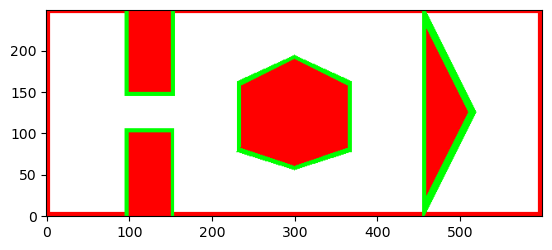

In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import matplotlib.pyplot as plt 
import numpy as np 
import math
import cv2 

# https://stackoverflow.com/questions/69671976/python-function-to-find-a-point-of-an-equilateral-triangle
def find_equal_triangle_coordinate(pt1, pt2):
                    
    pt3_x = (pt1[0]+pt2[0]+np.sqrt(3)*(pt1[1]-pt2[1]))/2 
    pt3_y = (pt1[1]+pt2[1]+np.sqrt(3)*(pt1[0]-pt2[0]))/2  
    unknown_pt = np.array([pt3_x, pt3_y])
    
    return unknown_pt

# Resource https://www.geeksforgeeks.org/program-find-line-passing-2-points/
def compute_line_abc(pt_a, pt_b):

    a_val = pt_b[1] - pt_a[1]
    b_val = pt_a[0] - pt_b[0]
    c_val = (a_val*(pt_a[0])) + (b_val*(pt_a[1]))

    return a_val, b_val, c_val

def create_map_grid():
    
    # Define map grid side
    map_height = 250
    map_width = 600
    map_grid = np.ones((map_height,map_width,3))
    
    # Define obstacle and wall color
    obstacle_color = (255,0,0) #RED
    # Define obstacle clearance color
    clearance_color = (0,255,0) #GREEN
    
    # Clearance mm_to_pixels_factor mm_to_pixels_factor 
    
    
    
    
    triangle_factor = 1000
    c = 5 #5 pixels
    
    # Set wall color 
    #cv2.rectangle(map_grid, (1,250), (600,1), obstacle_color, 5)
    for y in range(map_height):
        for x in range(map_width):
            
            # Plot walls
            # map_height = 250
            # map_width = 600
            if (x >= 0 and x < map_width and y >= 0 and y<5) or (x >= 0 and x < map_width and y >= 245  and y<map_height):
                map_grid[y,x] = obstacle_color
                
            if (x >= 0 and x < 5 and y >= 0 and y<map_height) or (x >= 595 and x < map_width and y >= 0 and y<map_height):
                map_grid[y,x] = obstacle_color

            #print(map_grid[0,559]) #IndexError: index 250 is out of bounds for axis 0 with size 250
                

            # Display rectangles 
            # Plot lower rectange obstacle space
            if x >= 100-c and x < 150+c and y >= 0-c and y <= 100+c:
                map_grid[y,x] = clearance_color
            # Plot lower rectange clearance
            if x >= 100 and x <= 150 and y >= 0 and y <= 100:
                map_grid[y,x] = obstacle_color

            # Plot upper rectange clearance
            if x >= 100-c and x <= 150+c and y >= 150-c and y <= 250+c:
                map_grid[y,x] = clearance_color
            # Plot upper rectange obstacle space
            if x >= 100 and x <= 150 and y >= 150 and y <= 250:
                map_grid[y,x] = obstacle_color
                
            #############################################################
            # Display hexagon
            
            hexagon_x_center = 300 #100+50+150
            hexagon_y_center = 125
            hex_edge_length = 75

            # Resource: quora.com/How-do-you-find-the-distance-between-the-edges-and-the-center-of-a-regular-hexagon-if-you-know-the-length-of-its-sides
            hex_dist_center_to_edge = hex_edge_length * math.sqrt(3)/2

            # Hexagon Vertex 1 - Top
            v1_x = int(100 + 50 + 150)
            v1_y = int(125 + hex_dist_center_to_edge)

            vertex1 = [hexagon_x_center, hexagon_y_center]
            vertex2 = [v1_x,v1_y]
            result = find_equal_triangle_coordinate(vertex1, vertex2)

            # Hexagon Center Coordinate
            map_grid = cv2.circle(map_grid, (hexagon_x_center,hexagon_y_center), radius=5, color=(255,0,0), thickness=-1)

            # Hexagon Vertex 2
            v2_x = 100 + 50 + 150 + hex_dist_center_to_edge
            v2_y = int(result[1])

            # Hexagon Vertex 6
            v6_x = v1_x - hex_dist_center_to_edge
            v6_y = int(result[1])

            # Hexagon Vertex 3
            v3_x = int(v2_x)
            v3_y = int(result[1]) - hex_edge_length

            # Hexagon Vertex 4
            v4_x = int(v1_x)
            v4_y = int(125 - hex_dist_center_to_edge) 

            # Hexagon Vertex 5
            v5_x = int(v6_x)
            v5_y = int(result[1])-hex_edge_length
            
            pt1 = [v1_x,v1_y+c]
            pt2 = [v2_x+c,v2_y+c]
            pt3 = [v3_x+c,v3_y-c]
            pt4 = [v4_x,v4_y-c]
            pt5 = [v5_x-c,v5_y-c]
            pt6 = [v6_x-c,v6_y+c]
            
            l1a, l1b, l1c = compute_line_abc(pt1, pt2)
            l2a, l2b, l2c = compute_line_abc(pt2, pt3)
            l3a, l3b, l3c = compute_line_abc(pt3, pt4)
            l4a, l4b, l4c = compute_line_abc(pt4, pt5)
            l5a, l5b, l5c = compute_line_abc(pt5, pt6)
            l6a, l6b, l6c = compute_line_abc(pt6, pt1)
            
            if ( ((l1b*y)+(l1a*x)-l1c) >= 0  and ((l2b*y)+(l2a*x)-l2c) >= 0) and ((l3b*y)+(l3a*x)-l3c) >= 0 and ((l4b*y)+(l4a*x)-l4c) >= 0 and ((l5b*y)+(l5a*x)-l5c) >= 0 and ((l6b*y)+(l6a*x)-l6c) >= 0:
                map_grid[y,x] = clearance_color
        
            pt1 = [v1_x,v1_y]
            pt2 = [v2_x,v2_y]
            pt3 = [v3_x,v3_y]
            pt4 = [v4_x,v4_y]
            pt5 = [v5_x,v5_y]
            pt6 = [v6_x,v6_y]
            
            l1a, l1b, l1c = compute_line_abc(pt1, pt2)
            l2a, l2b, l2c = compute_line_abc(pt2, pt3)
            l3a, l3b, l3c = compute_line_abc(pt3, pt4)
            l4a, l4b, l4c = compute_line_abc(pt4, pt5)
            l5a, l5b, l5c = compute_line_abc(pt5, pt6)
            l6a, l6b, l6c = compute_line_abc(pt6, pt1)
            
            if ( ((l1b*y)+(l1a*x)-l1c) >= 0  and ((l2b*y)+(l2a*x)-l2c) >= 0) and ((l3b*y)+(l3a*x)-l3c) >= 0 and ((l4b*y)+(l4a*x)-l4c) >= 0 and ((l5b*y)+(l5a*x)-l5c) >= 0 and ((l6b*y)+(l6a*x)-l6c) >= 0:
                map_grid[y,x] = obstacle_color
                
            #############################################################
            # Display triangle 
            
            tri_low_pt = [460,25]
            tri_up_pt = [460,225]
            tri_right_pt = [510,125]
            
            t1a, t1b, t1c = compute_line_abc(tri_low_pt, tri_up_pt)
            t2a, t2b, t2c = compute_line_abc(tri_low_pt, tri_right_pt)
            t3a, t3b, t3c = compute_line_abc(tri_up_pt, tri_right_pt)
            
            if ( ((t1b*y)+(t1a*x)-(t1c-triangle_factor)) >= 0  and ((t2b*y)+(t2a*x)-(t2c+triangle_factor)) <= 0 and ((t3b*y)+(t3a*x)-(t3c-triangle_factor)) >= 0):
                map_grid[y,x] = clearance_color
            
            tri_low_pt = [460,25]
            tri_up_pt = [460,225]
            tri_right_pt = [510,125]
            
            t1a, t1b, t1c = compute_line_abc(tri_low_pt, tri_up_pt)
            t2a, t2b, t2c = compute_line_abc(tri_low_pt, tri_right_pt)
            t3a, t3b, t3c = compute_line_abc(tri_up_pt, tri_right_pt)
            
            if ( ((t1b*y)+(t1a*x)-t1c) >= 0  and ((t2b*y)+(t2a*x)-t2c) <= 0 and ((t3b*y)+(t3a*x)-t3c) >= 0):
                map_grid[y,x] = obstacle_color
                

                
    plt.figure()
    #map_grid[125:150,200:300] = (0,255,255)
    plt.imshow(map_grid, origin="lower")
    
#     plt.figure()
#     plt.imshow(map_grid[0:6,0:6], origin="lower")
    
    return map_grid, map_height, map_width 
    
     

# map_grid, map_height, map_width = create_map_grid()


# In[2]:


# DIJKSTRA's ALGORITHM APPROACH FOR FORWARD SEARCH POINT ROBOT PROBLEM

# Required imported libraries
from collections import deque # speeds up python queue data structure operation
from datetime import datetime
import numpy as np
import heapq as hq
import time

###############################################################################
def check_node_in_obstacle_space(child_node_x, child_node_y, c2c_matrix):
    if c2c_matrix[child_node_y][child_node_x] == -1:
        return True
    else:
        return False

###############################################################################
# Function also determines the validity of the swap/action
def generate_child_node(c2c_matrix, parent_node, action, map_grid, map_height, map_width):
    valid_move = 0 # boolean truth value of valid swap
    parent_node_x = parent_node[3][0]
    parent_node_y = parent_node[3][1]
    child_node_x = 0
    child_node_y = 0
        
    # check for valid moves
    is_node_obstacle = False
    
    if action == 1: #left (-1,0)
        cost_to_move = 1
        if parent_node_x != 0: 
            child_node_x = parent_node_x - 1
            child_node_y = parent_node_y
            is_node_obstacle = check_node_in_obstacle_space(child_node_x, child_node_y, c2c_matrix)
            
            if is_node_obstacle == False:
                valid_move = 1
            else:
                valid_move = 0
    
    elif action == 2: #up (0,1)
        cost_to_move = 1
        if parent_node_y != map_height: 
            child_node_x = parent_node_x 
            child_node_y = parent_node_y + 1
            is_node_obstacle = check_node_in_obstacle_space(child_node_x, child_node_y, c2c_matrix)
            print("is_node_obstacle ? :", is_node_obstacle)
            if is_node_obstacle == False:
                valid_move = 1
            else:
                valid_move = 0

    elif action == 3: # right (1,0)
        cost_to_move = 1
        if parent_node_x != map_width:
            child_node_x = parent_node_x + 1
            child_node_y = parent_node_y
            is_node_obstacle = check_node_in_obstacle_space(child_node_x, child_node_y, c2c_matrix)
            
            if is_node_obstacle == False:
                valid_move = 1
            else:
                valid_move = 0

    elif action == 4: # down (0,-1)
        cost_to_move = 1
        if parent_node_y != 0: 
            child_node_x = parent_node_x 
            child_node_y = parent_node_y - 1
            is_node_obstacle = check_node_in_obstacle_space(child_node_x, child_node_y, c2c_matrix)
            
            if is_node_obstacle == False:
                valid_move = 1
            else:
                valid_move = 0

    elif action == 5: # right & up (1,1)
        cost_to_move = 1.4
        if parent_node_x != map_width and parent_node_y != map_height: 
            child_node_x = parent_node_x + 1
            child_node_y = parent_node_y + 1
            is_node_obstacle = check_node_in_obstacle_space(child_node_x, child_node_y, c2c_matrix)
            
            if is_node_obstacle == False:
                valid_move = 1
            else:
                valid_move = 0

    elif action == 6: # left & up (-1,1)
        cost_to_move = 1.4
        if parent_node_x != 0 and parent_node_y != map_height: 
            child_node_x = parent_node_x - 1
            child_node_y = parent_node_y + 1
            is_node_obstacle = check_node_in_obstacle_space(child_node_x, child_node_y, c2c_matrix)
            
            if is_node_obstacle == False:
                valid_move = 1
            else:
                valid_move = 0
            
    elif action == 7: # right & down (1,-1)
        cost_to_move = 1.4
        if parent_node_x != map_width and parent_node_y != 0: 
            child_node_x = parent_node_x + 1
            child_node_y = parent_node_y - 1
            is_node_obstacle = check_node_in_obstacle_space(child_node_x, child_node_y, c2c_matrix)
            
            if is_node_obstacle == False:
                valid_move = 1
            else:
                valid_move = 0

    elif action == 8: # left & down (-1,-1)
        cost_to_move = 1.4
        if parent_node_x != 0 and parent_node_y != 0: 
            child_node_x = parent_node_x - 1
            child_node_y = parent_node_y - 1
            is_node_obstacle = check_node_in_obstacle_space(child_node_x, child_node_y, c2c_matrix)
            
            if is_node_obstacle == False:
                valid_move = 1
            else:
                valid_move = 0


    # returned node is the resulting child node of the requested action
    return cost_to_move, valid_move, child_node_x, child_node_y

#################################################################################################
# Function uses backtracking to find the node pathway from the initial node to goal node
def generate_path(node_info, goal_node_idx):
    
    backtrack_arry = []
    curr_node_idx = goal_node_idx # this value will change throughout function
    counter = goal_node_idx
    
    while counter != 1: # when counter == 1, initial node is reached
        for k in range(len(node_info)):
            if node_info[k][0] == curr_node_idx: # compare indices
                backtrack_arry.append(node_info[k][2]) # append node to array
                curr_node_idx = node_info[k][1] # update parent index, next node to search for
                counter = curr_node_idx
                
                if counter == 1: # when counter == 1, initial node is reached
                    backtrack_arry.append(node_info[0][2])
    
    backtrack_arry = np.array(backtrack_arry)   
    
    # Source: https://numpy.org/doc/stable/reference/generated/numpy.fliplr.html
    # Must use flipud function to ensure using a forward search strategy!!
    backtrack_node_path_arry = np.flipud(backtrack_arry)
    
    return backtrack_node_path_arry

#################################################################################################
# Function prints content of the NodesInfo.txt, Nodes.txt, and nodePath.txt files to the terminal 
# in slightly different format 
def display_results(node_info, node_mtx_to_string_elem_arry, backtrack_node_path_arry):
    print()
    print("Nodes Info: 1st Col: Node Index, 2nd Col: Parent Node Index, 3rd Col: Node")
    print()
    print(node_info)
    print()
    
    print("Nodes: All the explored/visited states")
    print()
    print(node_mtx_to_string_elem_arry)
    print()
    
    print("Pathway from Initial Node to Goal Node Using Backtracking")
    print()
    print(backtrack_node_path_arry)
    print()
    
    return 

#################################################################################################

def initialize_c2c_matrix(map_grid, map_height, map_width):
    c2c_matrix = np.zeros((map_height, map_width))
    for y in range(map_height):
        for x in range(map_width):
            if y == 0 and x == 0:
                c2c_matrix[y,x] = 0
            elif np.mean(map_grid[y,x]) == 1: # free space
                # Test statement below 
                #map_grid[y,x] = (0,255,255)
                c2c_matrix[y,x] = float('inf')
            else: # obstacle/wall space
                c2c_matrix[y,x] = -1

    return c2c_matrix  

def get_c2c_value(map_grid, map_height, map_width, child_x, child_y):
    c2c_matrix = np.zeros((map_height, map_width))
    for y in range(map_height):
        for x in range(map_width):
            if y == child_y and x == child_x:
                c2c_value = c2c_matrix[y,x]
                return c2c_value   

# def compute_cost_to_come():

def compute_manhat_dist_between_nodes(x1,x2,y1,y2):
    x = np.array([x1,x2])
    y = np.array([y1,y2])
    tmp1 = x - y
    tmp2 = np.abs(tmp1)
    manhattan_distance = np.sum(tmp2)
    
    return manhattan_distance

def update_child_parent(open_queue, node_idx, curr_parent_idx):
    
    for i in range(len(open_queue)):
        if open_queue[i][1] == node_idx:
            open_queue[i][2] = curr_parent_idx
            break
    
    return

#################################################################################################
                
# Main function that calls subfunctions that perform search operations
def dijkstra_approach_alg(c2c_matrix, initial_node_coord, goal_node_coord, map_grid, map_height, map_width):
    
    cntr = 1 # Counter
    node_idx = 1 # Node index 
    curr_parent_idx = 0 # Parent index
    
    
#     print(np.shape(c2c_matrix))
#     print()
#     print(c2c_matrix[100])
    
    initial_node = (0, node_idx, curr_parent_idx, initial_node_coord)
    #goal_node = (0, node_idx, curr_parent_idx, goal_node_coord)
    
    visited_queue = [] # explored, valid nodes
    goal_found = False # When true, stop searching 

    # Create empty queue
    open_queue = [] # keeps track of node queue to be processed
    hq.heappush(open_queue, initial_node) 
    hq.heapify(open_queue)
#     print("First node appended: \n", hq.heappop(open_queue))
#     print()
            
    # Process next node in queue
    # When all children are checked, remove next top node from data structure
    while (len(open_queue) != 0): # Stop search when node queue is empty 
        curr_node = hq.heappop(open_queue)
        print("Node Popped from of Num Queue, Curr Length: ", len(open_queue))
        print()

        print("Parent IDX: ", curr_parent_idx)
        print()
        print("Current Parent Node:")
        print(curr_node)
        print()

        # Append first (initial) node to the node queue  
        if cntr == 1:
            visited_queue.append(curr_node) #(node_idx, curr_parent_idx, curr_node))
        cntr = cntr + 1
    
        # Evaluate children
        curr_parent_idx = curr_parent_idx + 1 
        i = 1
        found = 0
        
        while i < 9:

            if found == 1:
                break
                
            if i == 1:
                print("Action Left (-1,0)")
            elif i == 2:
                print("Action Up (0,1)")
            elif i == 3:
                print("Action Right (1,0)")
            elif i == 4:
                print("Action Down (0,-1)")
            elif i == 5:
                print("Action Right & Up (1,1)")
            elif i == 6:
                print("Action Left & Up (-1,1)")
            elif i == 7:
                print("Action Right & Down (1,-1)")
            elif i == 8:
                print("Action Left & Down (-1,-1)")
                
            cost_to_move, valid_move, child_node_x_valid, child_node_y_valid = generate_child_node(c2c_matrix, curr_node, i, map_grid, map_height, map_width)
                                    
            ##################################################################################3
                
            if valid_move == 1:
                print("Valid Move Boolean -> True")
                print("Child Node X-Coord: ", child_node_x_valid)
                print("Child Node Y-Coord: ", child_node_y_valid)
                
                is_equal = (child_node_x_valid == goal_node_coord[0] and child_node_y_valid == goal_node_coord[1]) # check if goal node reached
                print()
                print("- - - - - - - - - - - - - - - - - - ")
                print()
                print("Equal to Goal State ? : ", is_equal)
                print()
                
                if (is_equal == True): 
                    node_idx = node_idx + 1 
                    child_c2c_val = get_c2c_value(map_grid, map_height, map_width, child_node_x_valid, child_node_y_valid)
                    child_node = (child_c2c_val, node_idx, curr_parent_idx,(child_node_x_valid, child_node_y_valid))
                    visited_queue.append(child_node)
                    found = 1
                    goal_found = True
                    print("Last Child Node (Goal Node): \n", child_node)
                    print()
                    
                    print()
                    print("##############################################")
                    print()
                    print("Problem solved, now backtrack to find pathway!")
                    print()
                    print("______________________________________________")
                    print()    
                    
                    return goal_found

                    #########################################################################################
                    # Format results to be outputted to terminal and text files
#                     node_info = np.array(visited_queue, dtype=object)

#                     visited_array = np.array(visited_queue, dtype=object)
                    
#                     nodes = visited_array[:,2]
                    
#                     node_mtx_to_string_elem_arry = []
                                        
#                     # Source: https://www.geeksforgeeks.org/python-program-to-convert-matrix-to-string/
#                     # Convert node matrix to string
#                     in_del, out_del = " ", " "
#                     for i in range(len(visited_queue)):
#                         node_mtx_to_string_elem = out_del.join([in_del.join([str(block) for block in tile]) for tile in nodes[i].T])
#                         node_mtx_to_string_elem_arry.append(node_mtx_to_string_elem)
                        
#                     goal_node_idx = node_idx

#                     return node_info, np.array(node_mtx_to_string_elem_arry), goal_node_idx
                
                    #########################################################################################
                
                else: # Goal state not found yet
                    
                    print("child_node_x_valid: ", child_node_x_valid)
                    print("child_node_y_valid: ", child_node_y_valid)
                    
                    # Check to see if current state or node has been visited already
                    explored = False
                    for j in range (len(visited_queue)):
                        if (visited_queue[j][3] == (child_node_x_valid, child_node_y_valid)): # check node indices
                            explored = True
                            break
                        else:
                            explored = False
                            
                    parent_c2c_val_stored = get_c2c_value(map_grid, map_height, map_width, curr_node[3][0], curr_node[3][1])
                    child_c2c_val_stored = get_c2c_value(map_grid, map_height, map_width, child_node_x_valid, child_node_y_valid)
                    manhat_dist = compute_manhat_dist_between_nodes(child_node_x_valid, child_node_y_valid, curr_node[3][0], curr_node[3][1])
   
                    if (explored == True):
                        print("Child already visited/explored, open_queue stays same, C2C UPDATED")
                        child_new_c2c_val = parent_c2c_val_stored + cost_to_move
                        #child_new_c2c_val = parent_c2c_val_stored + manhat_dist
                        
                        if child_new_c2c_val < child_c2c_val_stored:
                            child_c2c_val_updated = child_new_c2c_val
                            c2c_matrix[child_node_y_valid][child_node_x_valid] = child_c2c_val_updated
                            update_child_parent(open_queue, node_idx, curr_parent_idx)
                    else:
                        print("Child not yet visited/explored, open_queue appended")
                        child_c2c_val_updated =  parent_c2c_val_stored + cost_to_move
                        #child_c2c_val_updated =  parent_c2c_val_stored + manhat_dist
                        c2c_matrix[child_node_y_valid][child_node_x_valid] = child_c2c_val_updated
                        child_node = (child_c2c_val_updated, node_idx, curr_parent_idx,(child_node_x_valid, child_node_y_valid))
                        open_queue.append(child_node)
                        
                        node_idx = node_idx + 1 
                        
            else:
                print("Valid Move Boolean -> False")
                            

            ##################################################################################
            # Verification Statements
            print("Length of Open Queue: ", len(open_queue))
            print("Length of Visited Queue: ", len(visited_queue))
            print("Goal Found Boolean: ", goal_found)
            print()

            print("Parent IDX: ", curr_parent_idx)
            if valid_move == 1:
                print("Current Valid Child IDX: ", node_idx)

            i = i + 1
            if i != 9:
                print()

            print("#################################################################")
            print()
                
        visited_queue.append((curr_node[0], curr_node[1], curr_node[2], curr_node[3]))

    # End of outter while loop    
    print("Goal Found Boolean: ", goal_found)
    print()
        
    return goal_found
    
#################################################################################################
    
# Function that prints results of eight_puzzle_problem function and times BFS and Traceback operations
def main():
    
    # Using different ways to compute time algorithm takes to solve problem
    start1 = time.time()
    start2 = datetime.now()
    
    map_grid, map_height, map_width = create_map_grid()
    c2c_matrix = initialize_c2c_matrix(map_grid, map_height, map_width)

    x_initial, y_initial = eval(input("Enter start node's (x,y) coordinates seperated by comma. Ex: 1,2 "))
    print("Start node x-coordinate:", x_initial)
    print("Start node y-coordinate:",y_initial)
    print()
    
    initial_valid = check_node_in_obstacle_space(x_initial, y_initial, c2c_matrix)
    
    if (initial_valid == True):
        print("Re-enter initial node, coordinates not within freespace.")
        return
    
    x_goal, y_goal = eval(input("Enter goal node's (x,y) coordinates seperated by comma. Ex: 1,2 "))
    print("Goal node x-coordinate:",x_goal)
    print("Goal node y-coordinate:",y_goal)
    print()
    
    goal_valid = check_node_in_obstacle_space(x_goal, y_goal, c2c_matrix)
    
    if (goal_valid == True):
        print()
        print("Re-enter goal node, coordinates not within freespace.")
        return

    print("########################################################")
    
    initial_node_coord = (x_initial, y_initial)
    goal_node_coord = (x_goal, y_goal)
    
    
    goal_found = dijkstra_approach_alg(c2c_matrix, initial_node_coord, goal_node_coord, map_grid, map_height, map_width)
    
    print("Was goal found ? : ", goal_found)
#     #################################################################################################
#     # FUNCTION TO GENERATE NODE PATHWAY FROM INITIAL TO GOAL NODE
#     backtrack_node_path_arry = generate_path(node_info, goal_node_idx)
    
#     end1 = time.time()
#     end2 = datetime.now()
    
#     #################################################################################################
#     # FUNCTIONS TO DISPLAY RESULTS TO TERMINAL AND TEXTFILES
    
#     # Execute function to print results to terminal
#     display_results(node_info, node_mtx_to_string_elem_arry, backtrack_node_path_arry)
    
#     # Execute functions to print results to associated text files
#     output_nodePath_textfile(node_info, node_mtx_to_string_elem_arry, backtrack_node_path_arry)
#     output_Nodes_textfile(node_info, node_mtx_to_string_elem_arry, backtrack_node_path_arry)
#     output_NodesInfo_textfile(node_info, node_mtx_to_string_elem_arry, backtrack_node_path_arry)
    
#     # Execute function visualize pathway from initial node to goal node
#     plot_path()
    
#     #################################################################################################
    
#     # Soure for time functions 
#     # https://stackoverflow.com/questions/27779677/how-to-format-elapsed-time-from-seconds-to-hours-minutes
#     # -seconds-and-milliseco
    
#     # Method 1 
#     time_solved = round(end1 - start1, 4) # number of seconds passed since epoch (point where time begins)
#     print("- 8 Puzzle Problem solved in seconds (Method 1): ", time_solved)
    
#     # Method 2
#     hrs, remain = divmod(end1 - start1, 3600)
#     mins, secs = divmod(remain, 60)
#     print("- 8 Puzzle Problem solved in (hours:min:sec:milliseconds) (Method 2): {:0>2}:{:0>2}:{:05.2f}".format(int(hrs),int(mins),secs))
    
#     # Method 3
#     runtime=end2-start2
#     print("- Puzzle Problem solved in (hours:min:sec:milliseconds) (Method 3): " + str(runtime))
    
#     #################################################################################################
    
    return # end of main() function

# Call main function
main()

# END OF SOURCE CODE FILE
#########################################################################################################################################


# # 
